In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import joblib


In [ ]:
df=pd.read_csv("/content/Cleaned_diabetes_disease.csv")

In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df.head(4)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0


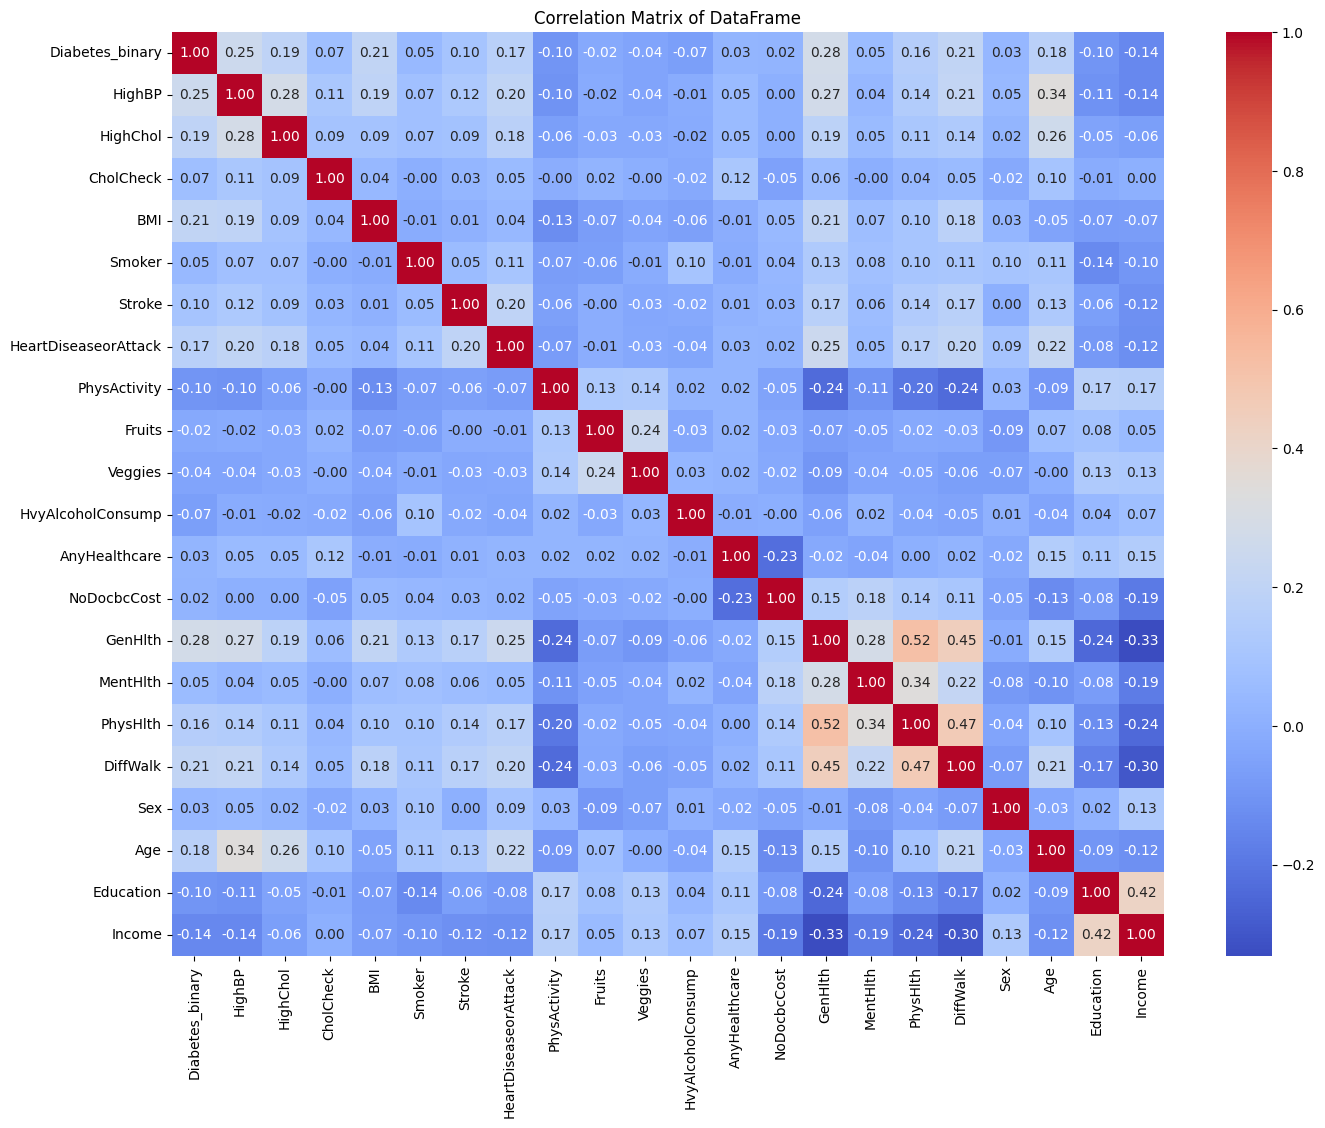

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of DataFrame')
plt.show()

In [ ]:
threshold = 0.10
y = df['Diabetes_binary']

corr_with_target = df.corr()['Diabetes_binary']
selected_features = corr_with_target[abs(corr_with_target) >= threshold].index.tolist()
selected_features.remove('Diabetes_binary')

X = df[selected_features]





In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)


In [ ]:
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)



In [ ]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8532519882340124
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     38876
         1.0       0.57      0.16      0.25      7019

    accuracy                           0.85     45895
   macro avg       0.72      0.57      0.59     45895
weighted avg       0.82      0.85      0.82     45895



Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8320078439917202
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     38876
         1.0       0.41      0.21      0.28      7019

    accuracy                           0.83     45895
   macro avg       0.64      0.58      0.59     45895
weighted avg       0.80      0.83      0.81     45895



In [ ]:
from sklearn.pipeline import Pipeline
import joblib

trained_pipeline = Pipeline([
    ('scaler', scaler),      # already fitted
    ('model', rf_model)      # already trained
])


In [ ]:
joblib.dump(trained_pipeline, "Cleaned_diabetes_disease.pkl")
print("Pipeline saved successfully")


Pipeline saved successfully


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)

report_rf = classification_report(y_test, y_pred_rf)
print("\nRandom Forest Classification Report:\n", report_rf)





In [ ]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import joblib

# Save the XGBoost model
joblib.dump(model, 'xgboost_model.pkl')
print("XGBoost model saved as 'xgboost_model.pkl'")
